In [58]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [59]:
#Dataset - a random dataset

np.random.seed(42)

num_samples = 500

years_of_experience = np.random.randint(2, 21, size=num_samples)

slope = (200_000 - 60_000) / 18
intercept = 60_000

salaries = slope * years_of_experience + intercept + np.random.normal(0, 10_000, size=num_samples) 

data = {'Years_of_experience': years_of_experience, 'Salary': salaries}
df = pd.DataFrame(data)

In [60]:
df.describe()

,Years_of_experience,Salary
count,500.000000,500.000000
mean,10.616000,142570.011096
std,5.662922,44935.263058
min,2.000000,54881.134555
25%,5.750000,104426.300731
50%,10.000000,139865.032545
75%,16.000000,182341.125962
max,20.000000,241879.376204


<function matplotlib.pyplot.show(close=None, block=None)>

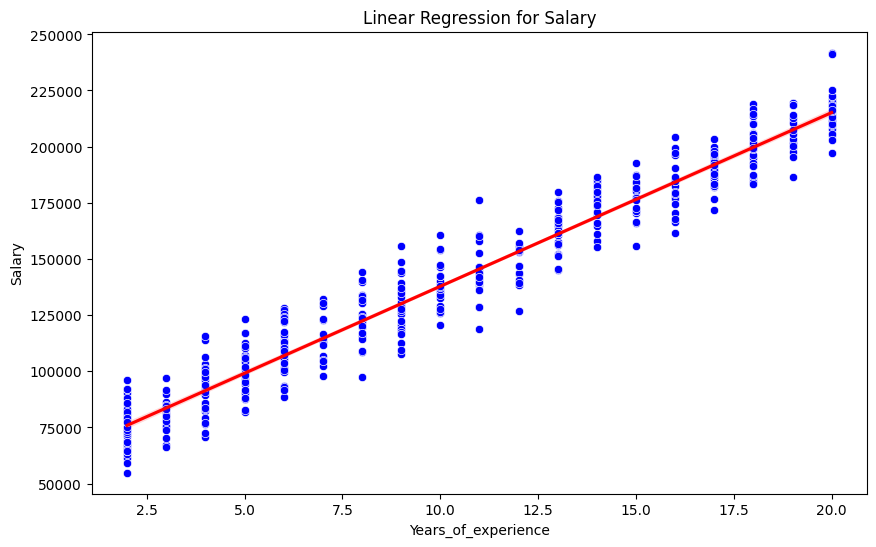

In [61]:
#visualizing the dataset

plt.figure(figsize=(10,6))
sns.scatterplot(x='Years_of_experience', y='Salary', data=df, color='blue')
sns.regplot(x='Years_of_experience', y='Salary', data=df, scatter=False,color='red')

plt.xlabel('Years_of_experience')
plt.ylabel('Salary')
plt.title('Linear Regression for Salary')

plt.show

In [62]:
X = df[['Years_of_experience']]

In [63]:
y = df[['Salary']]

In [64]:
# splitting dataset for model  

from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## **Building Our Model**

### **Linear Regression**

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(X_train, y_train)

LinearRegression()

In [68]:
# training score
lr.score(X_train, y_train)

0.951939494296042

In [69]:
# testing score
lr.score(X_test, y_test)

0.9432422887509949

In [70]:
#importing metrics to evaluate our model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [71]:
#making predictions using our model
y_pred = lr.predict(X_test)

In [72]:
# mean absolute error is the absolute difference between the predicted values and actual observed values 

mean_absolute_error(y_test, y_pred)

7858.367526682463

In [73]:
# mean squared error is the avearge of the squared differences between the predicted value and the actual value

mean_squared_error(y_test, y_pred)

# used to determine how accurate your model is

90605101.64484808

In [74]:
#co-efficient of determination: fit of regression model compared to data

r2_score(y_test, y_pred)


0.9432422887509949

In [75]:
lr.coef_

array([[7781.55910389]])

In [76]:
# y = mx +  b
lr.intercept_

array([60161.07503151])

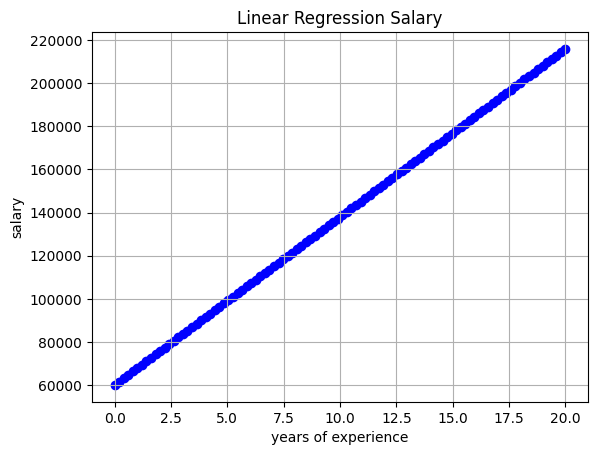

In [77]:
coefficients = lr.coef_
intercept = lr.intercept_

x = np.linspace(0, 20, 100)
y = coefficients * x + intercept

plt.scatter(x, y, label=f'y {coefficients[0]}x + {intercept}', color='blue')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.title('Linear Regression Salary')

plt.grid()
plt.show()